In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [4]:
sns.set(style="whitegrid")

In [5]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


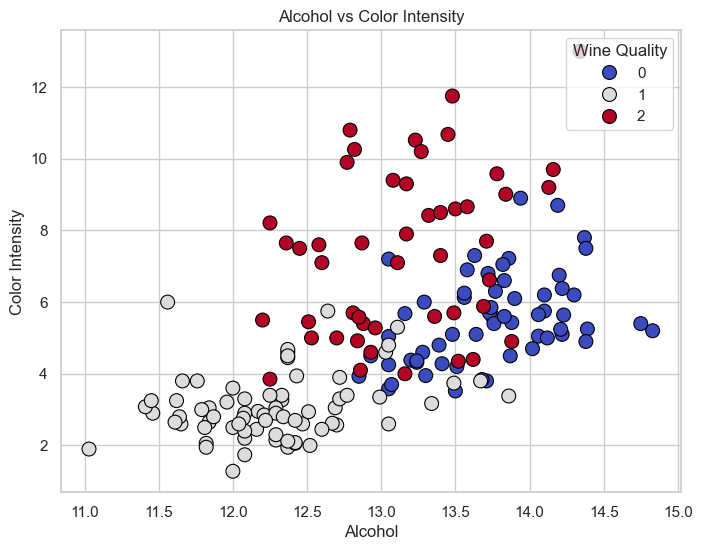

In [6]:
# 1. Scatter Plot - Alcohol vs Color Intensity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=wine_df['alcohol'], y=wine_df['color_intensity'], hue=wine_df['target'], palette="coolwarm", s=100, edgecolor='black')
plt.title('Alcohol vs Color Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.legend(title='Wine Quality', loc='upper right')
plt.show()

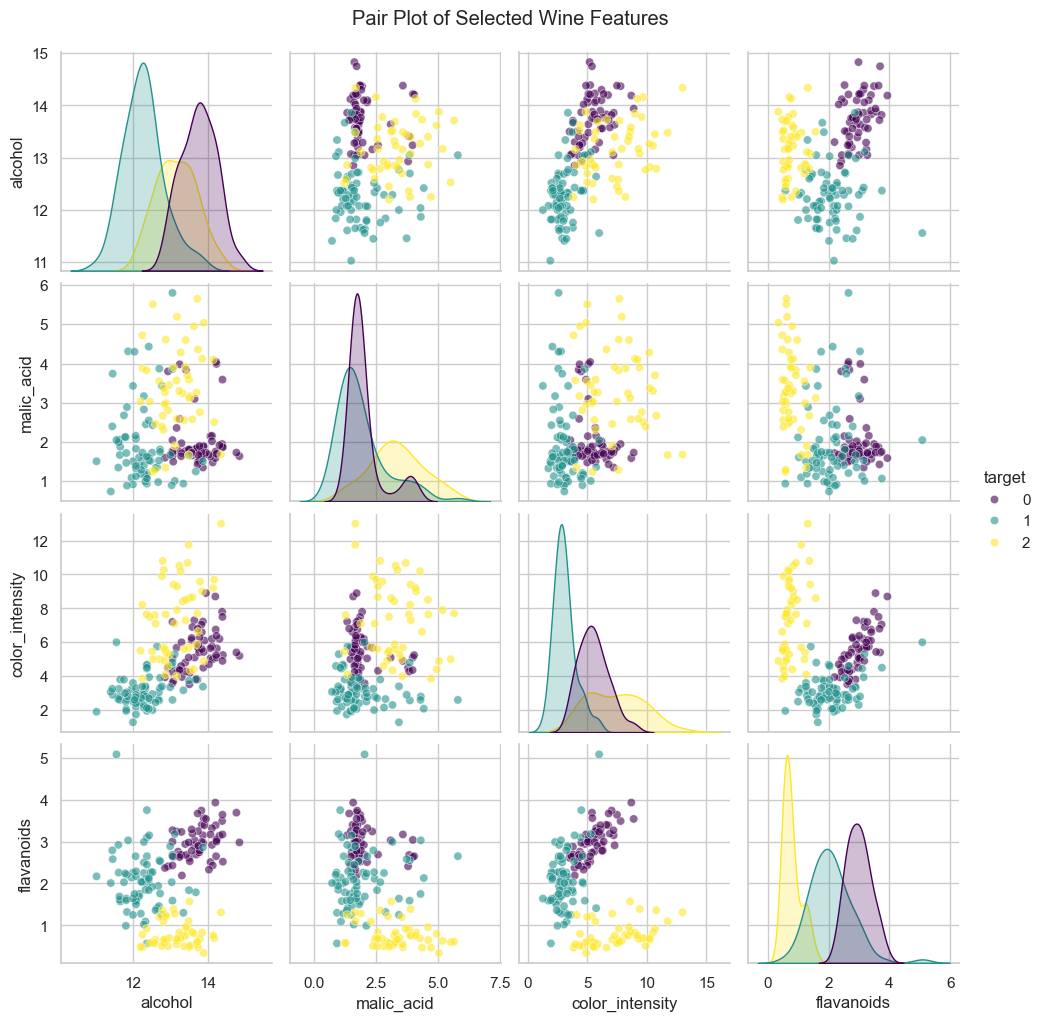

In [7]:
# 2. Pair Plot - Visualizing relationships between a subset of numerical features
sns.pairplot(wine_df[['alcohol', 'malic_acid', 'color_intensity', 'flavanoids', 'target']], hue='target', palette='viridis', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Selected Wine Features", y=1.02)
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_11848\71759712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=wine_df['target'], y=wine_df['alcohol'], palette="Set2")


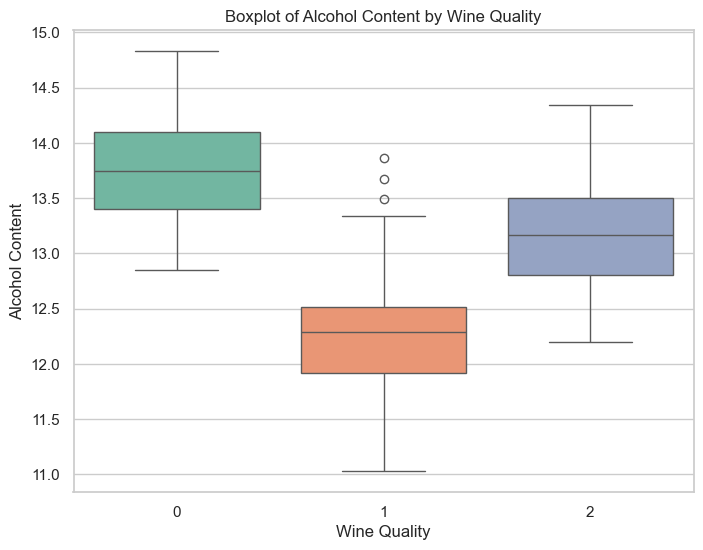

In [8]:
# 3. Box Plot - Distribution of Alcohol Content by Wine Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x=wine_df['target'], y=wine_df['alcohol'], palette="Set2")
plt.title('Boxplot of Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_11848\853251299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=wine_df['target'], y=wine_df['flavanoids'], palette="muted")


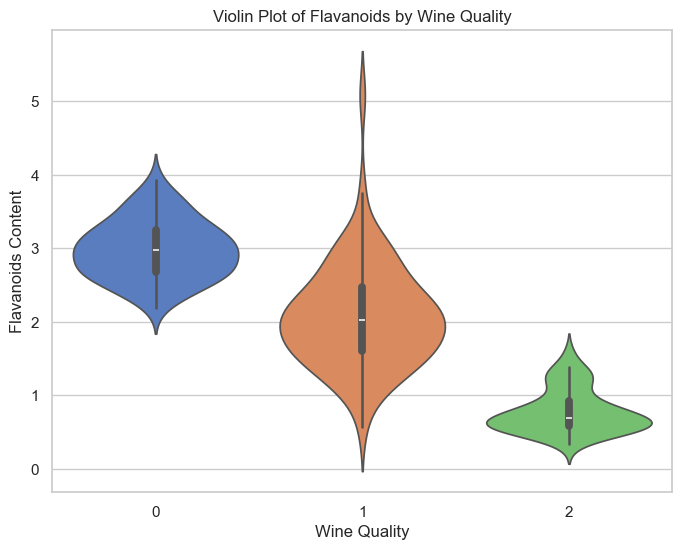

In [9]:
# 4. Violin Plot - Distribution of Wine Quality by Flavanoids Content
plt.figure(figsize=(8, 6))
sns.violinplot(x=wine_df['target'], y=wine_df['flavanoids'], palette="muted")
plt.title('Violin Plot of Flavanoids by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Flavanoids Content')
plt.show()

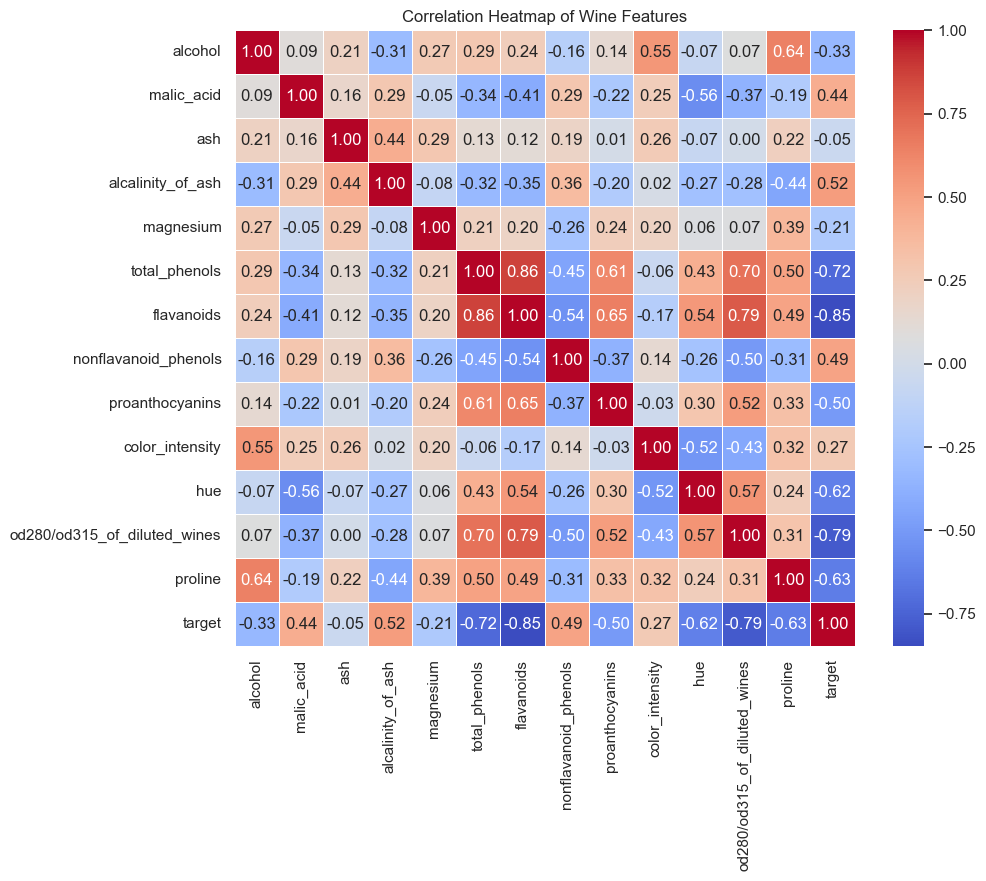

In [10]:
# 5. Heatmap - Correlation Matrix of Wine Features
plt.figure(figsize=(10, 8))
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

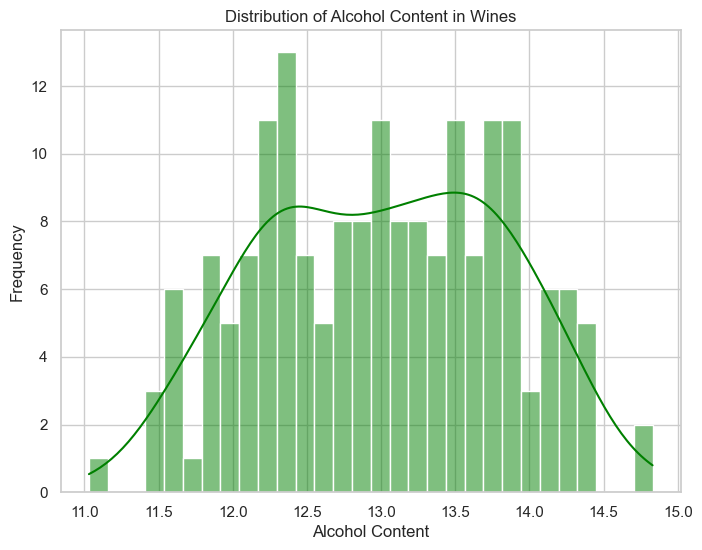

In [11]:
# 6. Histogram - Distribution of Alcohol Content
plt.figure(figsize=(8, 6))
sns.histplot(wine_df['alcohol'], kde=True, color='green', bins=30)
plt.title('Distribution of Alcohol Content in Wines')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

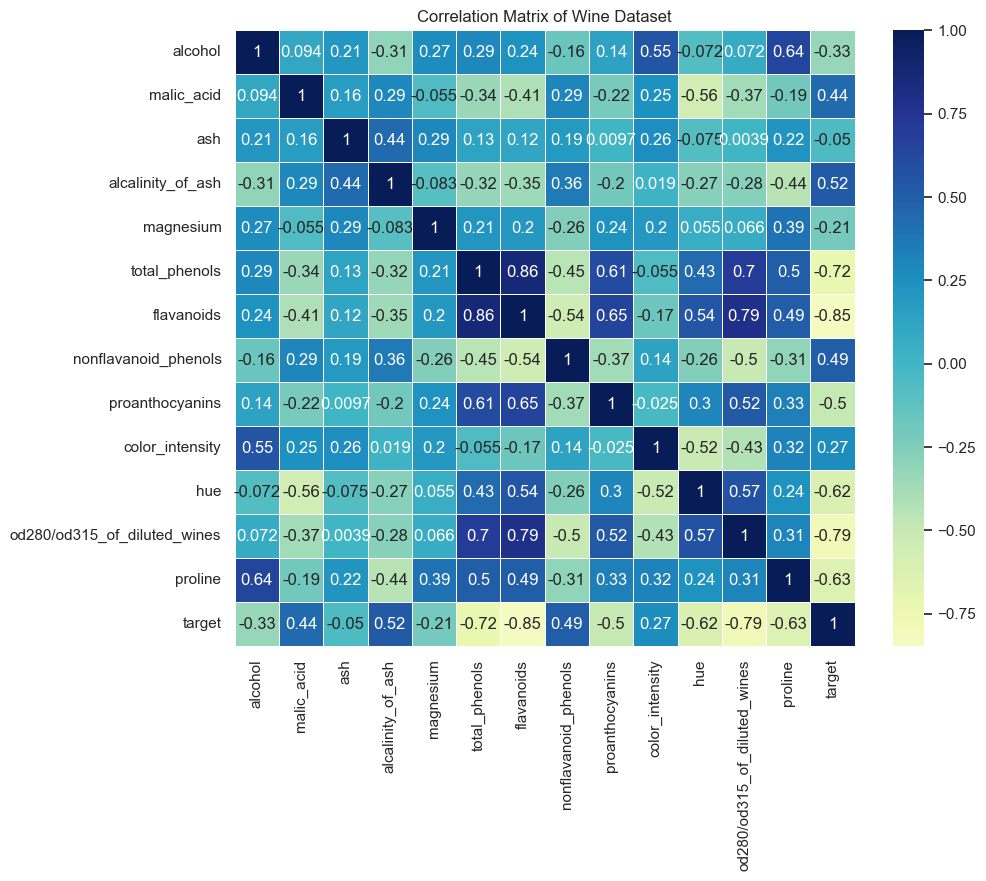

In [12]:
# 7. Correlation Plot of all features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Wine Dataset")
plt.show()

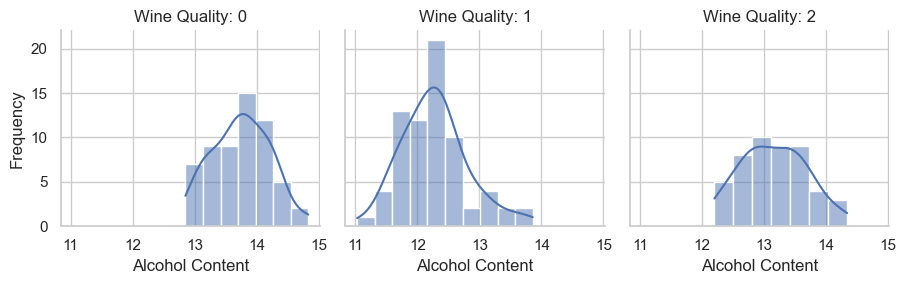

In [13]:
# 8. FacetGrid - Distribution of Alcohol content by Wine Quality
g = sns.FacetGrid(wine_df, col='target', col_wrap=4, height=3)
g.map(sns.histplot, 'alcohol', kde=True)
g.set_axis_labels('Alcohol Content', 'Frequency')
g.set_titles("Wine Quality: {col_name}")
plt.show()

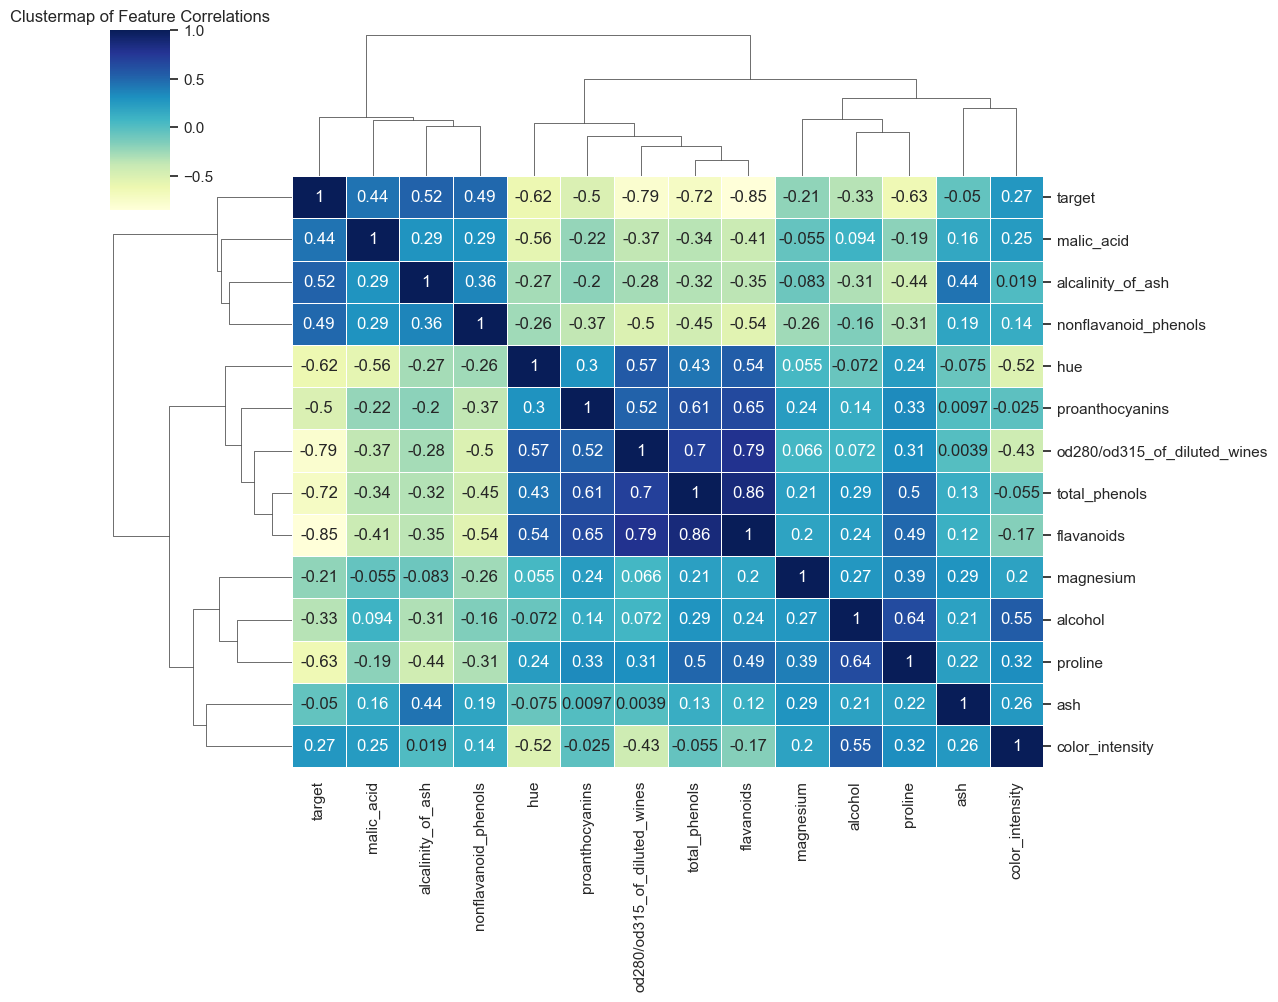

In [14]:
# 9. Clustermap - Correlation Matrix with Hierarchical Clustering
sns.clustermap(wine_df.corr(), annot=True, cmap="YlGnBu", figsize=(12, 10), linewidths=0.5)
plt.title('Clustermap of Feature Correlations')
plt.show()

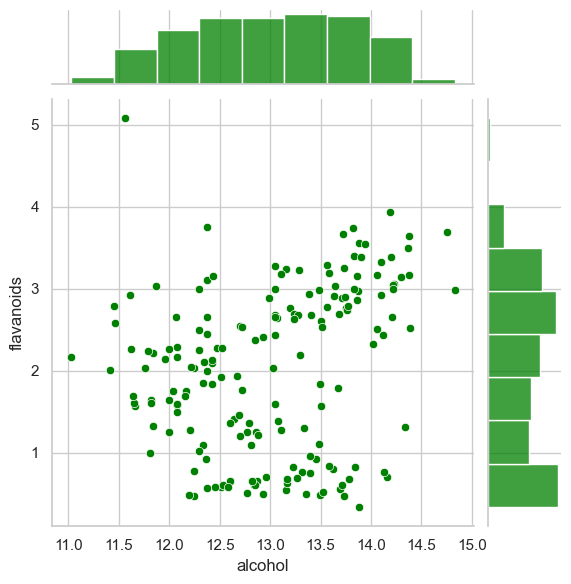

In [15]:
# 10. Jointplot - Alcohol vs Flavanoids
sns.jointplot(x='alcohol', y='flavanoids', data=wine_df, kind='scatter', color='green')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_11848\3269416817.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wine_df['alcohol'], shade=True, color='blue')


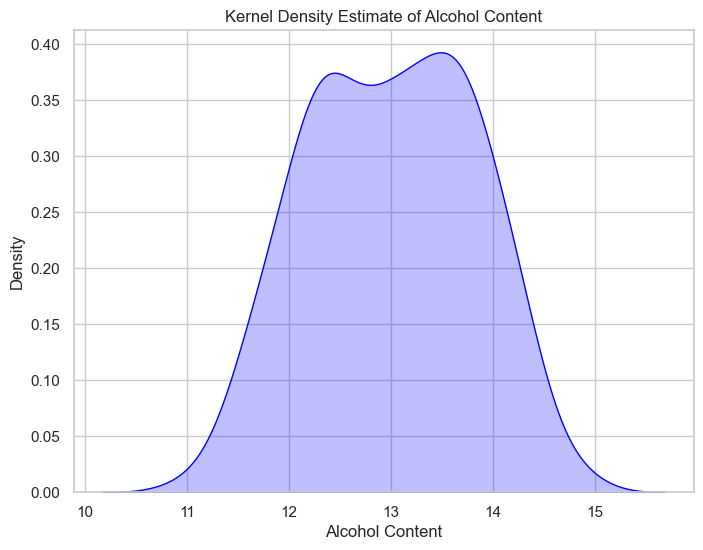

In [16]:
# 11. KDE Plot - Alcohol Content Distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(wine_df['alcohol'], shade=True, color='blue')
plt.title('Kernel Density Estimate of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_11848\184448941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='target', y='alcohol', data=wine_df, palette='Set2', size=6)


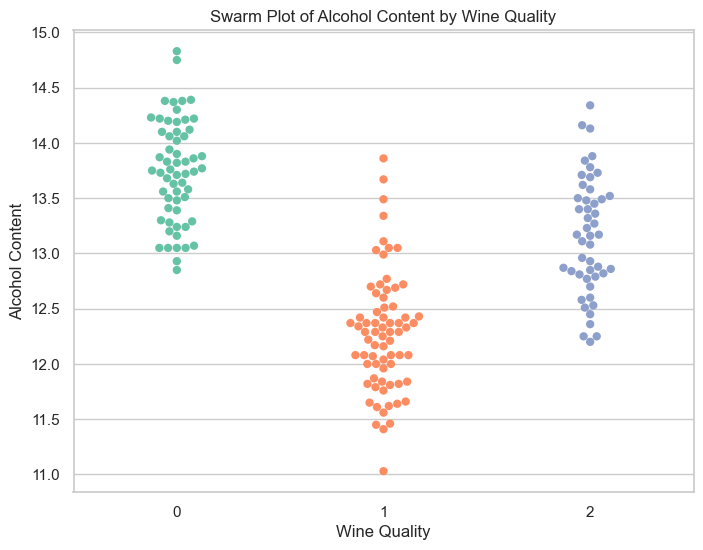

In [17]:
# 12. Swarm Plot - Alcohol Content by Wine Quality
plt.figure(figsize=(8, 6))
sns.swarmplot(x='target', y='alcohol', data=wine_df, palette='Set2', size=6)
plt.title('Swarm Plot of Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_11848\2774409176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y='flavanoids', data=wine_df, jitter=True, palette='coolwarm', size=6)


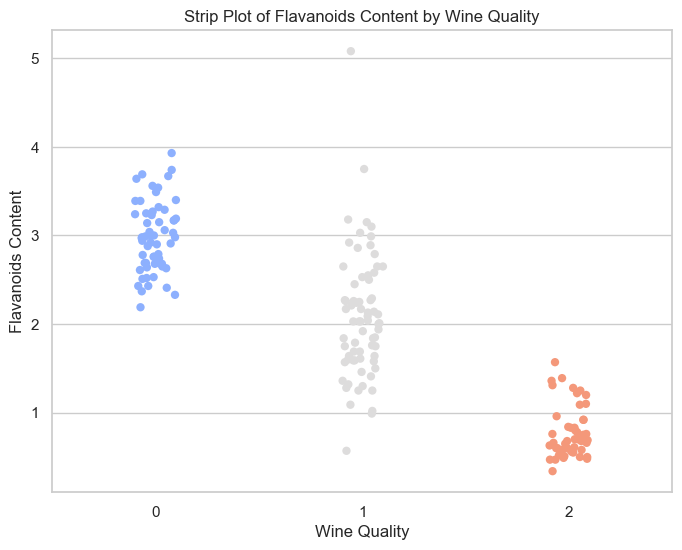

In [18]:
# 13. Strip Plot - Flavanoids Content by Wine Quality
plt.figure(figsize=(8, 6))
sns.stripplot(x='target', y='flavanoids', data=wine_df, jitter=True, palette='coolwarm', size=6)
plt.title('Strip Plot of Flavanoids Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Flavanoids Content')
plt.show()

C:\Users\abhin\AppData\Local\Temp\ipykernel_11848\3607979240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='alcohol', data=wine_df, palette='Blues_d')


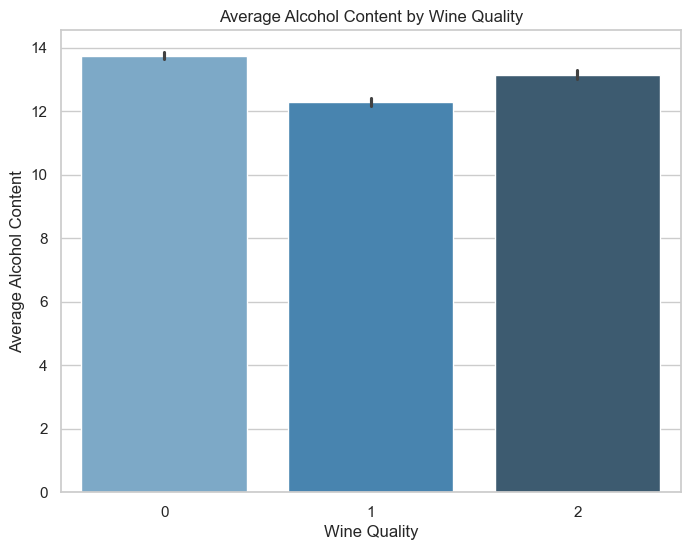

In [19]:
# 14. Bar Plot - Average Alcohol Content by Wine Quality
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='alcohol', data=wine_df, palette='Blues_d')
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')
plt.show()

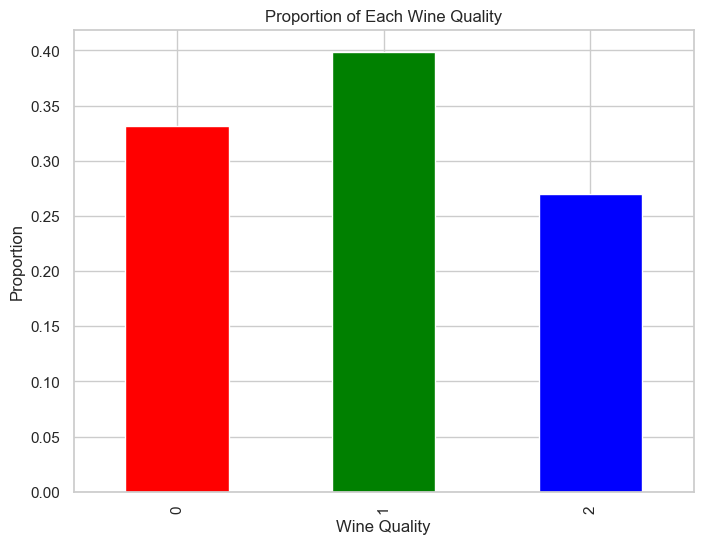

In [20]:
# 15. Stacked Bar Plot - Proportion of Each Wine Quality
wine_quality_counts = wine_df['target'].value_counts(normalize=True).sort_index()
wine_quality_counts.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'], figsize=(8, 6))
plt.title('Proportion of Each Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Proportion')
plt.show()

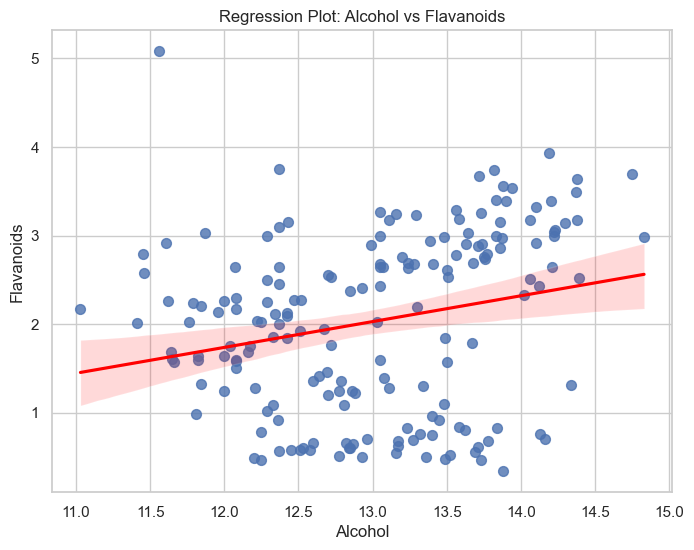

In [21]:
# 16. Regression Plot - Alcohol vs Flavanoids
plt.figure(figsize=(8, 6))
sns.regplot(x='alcohol', y='flavanoids', data=wine_df, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Regression Plot: Alcohol vs Flavanoids')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.show()


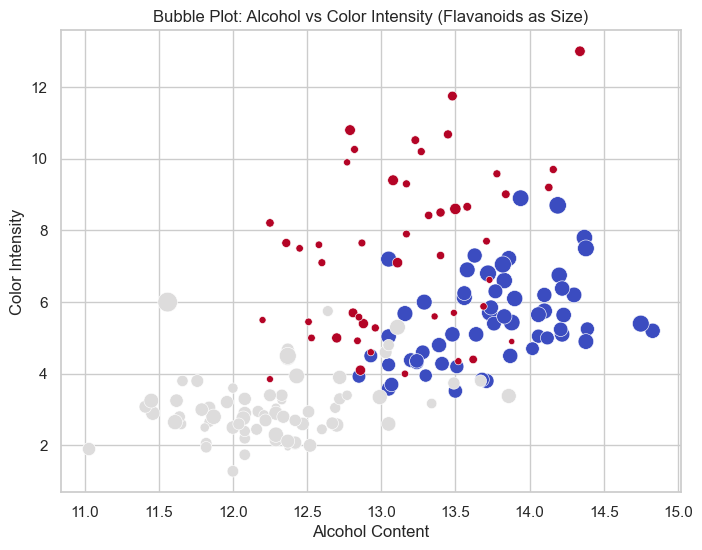

In [22]:
# 17. Bubble Plot - Alcohol vs Color Intensity with Size encoded by Flavanoids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='color_intensity', size='flavanoids', data=wine_df, sizes=(20, 200), hue='target', palette='coolwarm', legend=None)
plt.title('Bubble Plot: Alcohol vs Color Intensity (Flavanoids as Size)')
plt.xlabel('Alcohol Content')
plt.ylabel('Color Intensity')
plt.show()
